## BASIC IMAGE PROCESSING BASICS
 

This notebook has:
1. Grayscale Conversion

2. Histogram equalization

3. Edge Detection (Ridge, Canny, Canny Harris)

4. Blurring

5. Resizing 

6. Cropping

7. Rotating Images

1. Grayscale Conversion

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt

Reading Images

In [3]:
human_image1=plt.imread("Images\human1.jpg")
human_image1_cv2 = cv2.imread("Images\human1.jpg")
human_image1.shape, human_image1_cv2.shape #(height, width, pixels)

((4000, 6000, 3), (4000, 6000, 3))

In [4]:
type(human_image1)

numpy.ndarray

In [5]:
type(human_image1_cv2)

numpy.ndarray

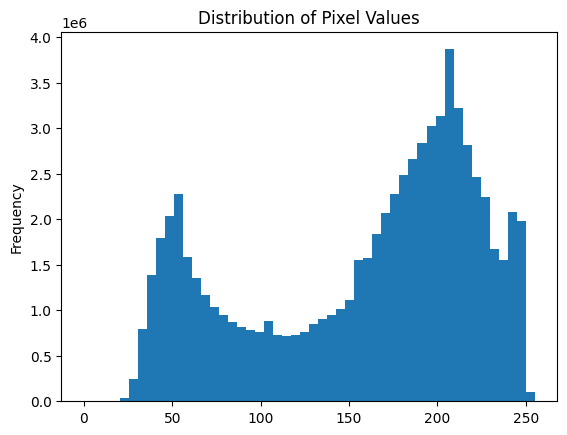

In [6]:
pd.Series(human_image1.flatten()).plot(kind= 'hist', bins=50,title="Distribution of Pixel Values" )
plt.show()

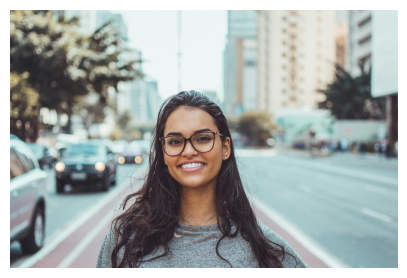

In [7]:
#Displaying images

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(human_image1)
ax.axis('off')
plt.show()

Image Channels = 3 in RGB
There are multiple ways to represents the color channels in images but the most common one is RGB and therefore, we go ahead with using RGB.

Text(0.5, 1.0, 'Green Channel')

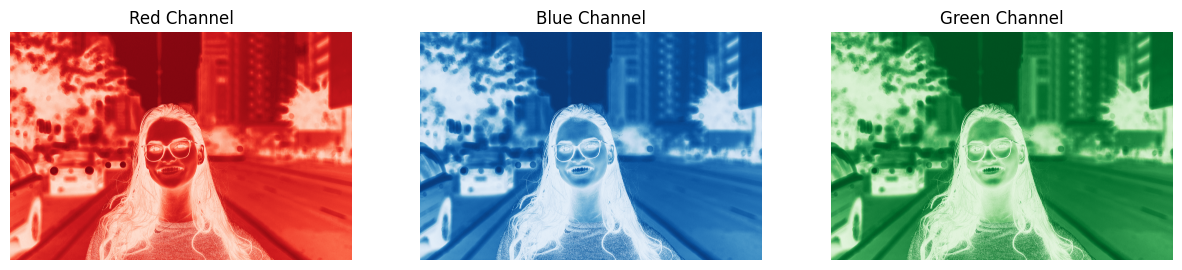

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(human_image1[:,:,0], cmap= "Reds")
axs[1].imshow(human_image1[:,:,1], cmap= "Blues")
axs[2].imshow(human_image1[:,:,2], cmap= "Greens")
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title("Red Channel")
axs[1].set_title("Blue Channel")
axs[2].set_title("Green Channel")

Text(0.5, 1.0, 'CV')

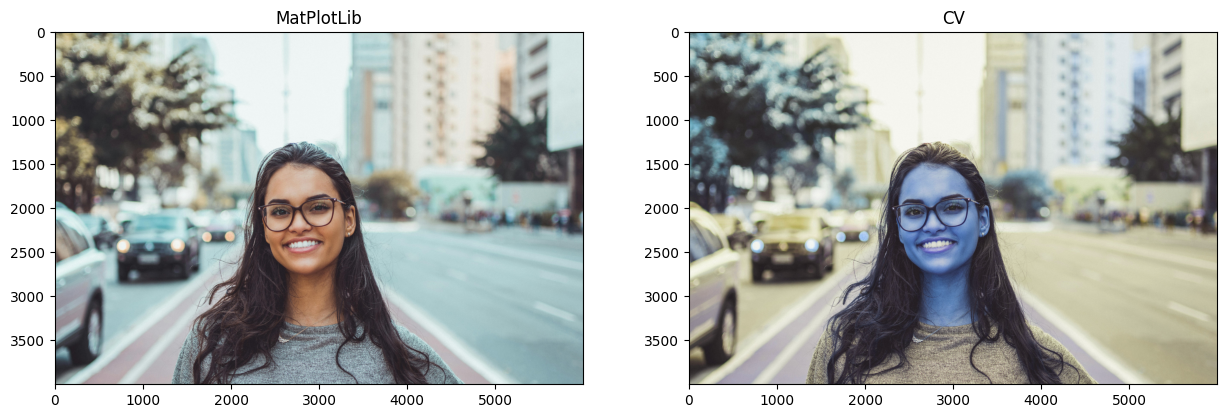

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(human_image1)
axs[1].imshow(human_image1_cv2)
axs[0].set_title("MatPlotLib")
axs[1].set_title("CV")

Text(0.5, 1.0, 'After Conversion')

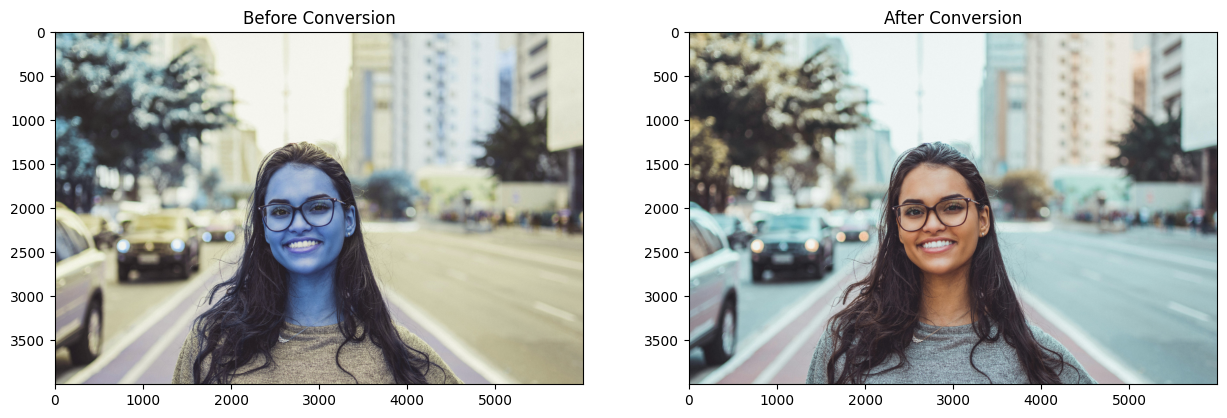

In [10]:
human_image1_cv2_conv = cv2.cvtColor(human_image1_cv2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(human_image1_cv2)
axs[1].imshow(human_image1_cv2_conv)
axs[0].set_title("Before Conversion")
axs[1].set_title("After Conversion")

### 1. Grayscale Converion

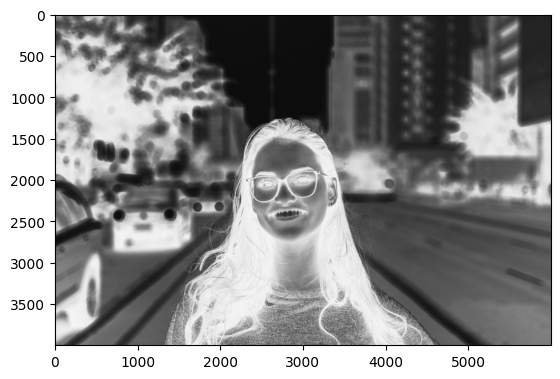

In [11]:
gray_image_human = cv2.cvtColor(human_image1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_human, cmap='Greys')

In [12]:
gray_image_human.shape

(4000, 6000)

### 2. Histogram Equalization

### 3. Edge Detection

cv2 kernels:

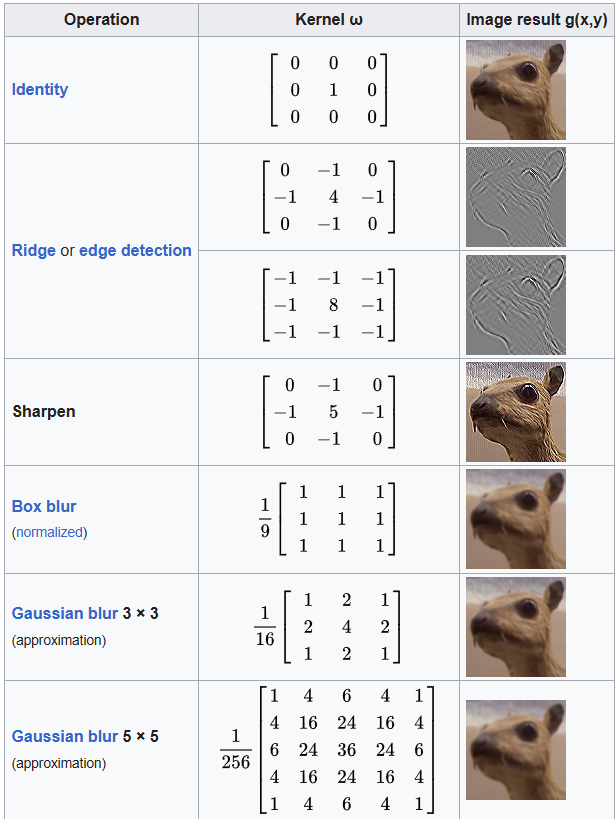

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

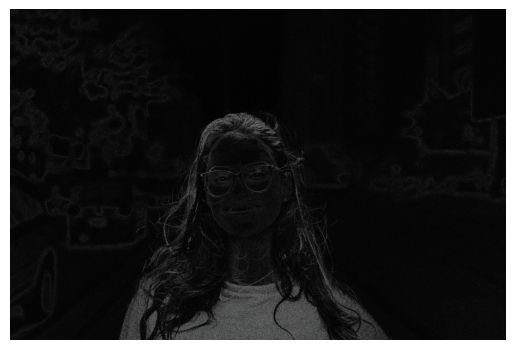

In [13]:
ridge = np.array([[-1, -1, -1], #detection of edges
                  [-1, 8,-1],
                  [-1,-1,-1]])\
                  
#here the kernel size is 3x3 

edge = cv2.filter2D(human_image1_cv2_conv,-1, ridge)
plt.imshow(edge)
plt.axis('off')

To understand the fundamentals of kernels, we've avoided using the inbuilt functions for Canny Edge Detection. However, CV2 has inbuilt function to perform such edge detections as well.

### 4. Blurring

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

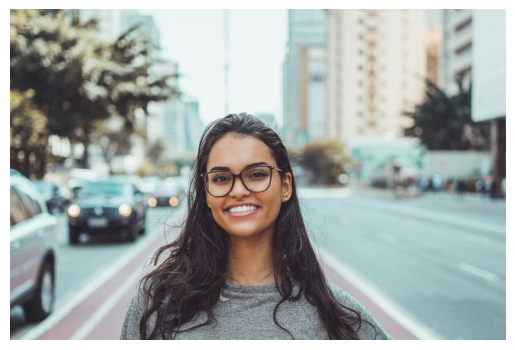

In [14]:
#for sharpening using kernels and not inbuilt functions

kernel_sharpening = np.array([[0,-1,0], 
          [-1,5,-1], 
          [0, -1, 0]])

sharpened_pic = cv2.filter2D(human_image1_cv2_conv,-1, kernel_sharpening)
plt.imshow(sharpened_pic)
plt.axis('off')


(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

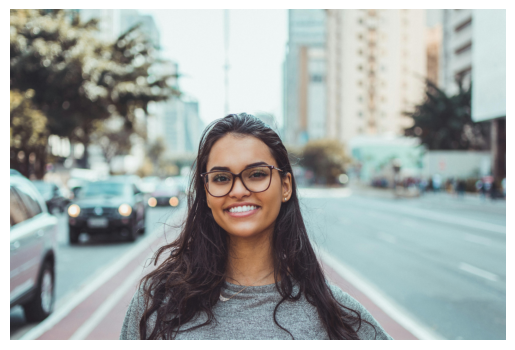

In [15]:
kernel_blurring = np.ones((3,3), np.float32) / 9 #kernel for box blur
blur_pic = cv2.filter2D(human_image1_cv2_conv,-1, kernel_blurring)
plt.imshow(blur_pic)
plt.axis('off')


(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

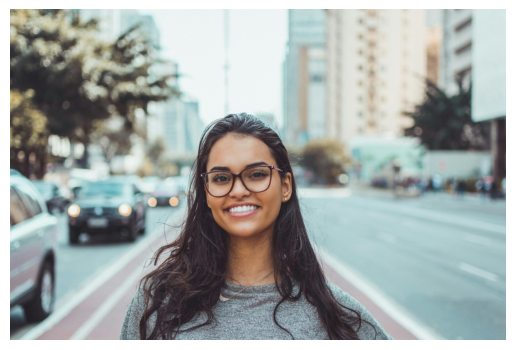

In [16]:
kernel_blurring = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]]) #kernel for 3x3 gaussian blur 


blur_pic = cv2.filter2D(human_image1_cv2_conv,-1, (kernel_blurring/16))
plt.imshow(blur_pic)
plt.axis('off')


(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

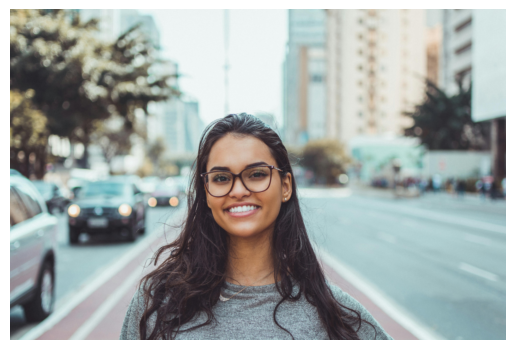

In [17]:
#using inbuilt filters

gaussian = cv2.GaussianBlur(human_image1_cv2_conv, (13, 13), 0) #lets increase the kernel size here
plt.imshow(gaussian)
plt.axis('off')


(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

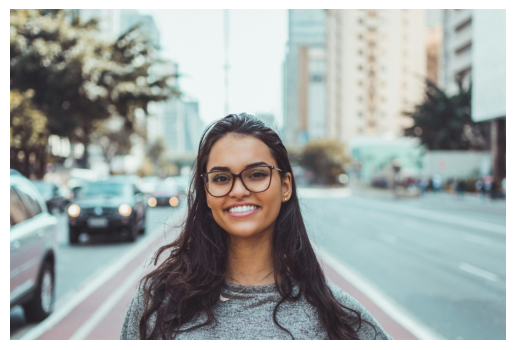

In [18]:
# we also have other blurs such as median blur

medianBlur = cv2.medianBlur(human_image1_cv2_conv, 9) 
plt.imshow(medianBlur)
plt.axis('off')

In [19]:
#since the resulting image doesnt look too visually different, lets try adding some noise to the image
# we try adding some salt and pepper noise to the image and then try blurring the images

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

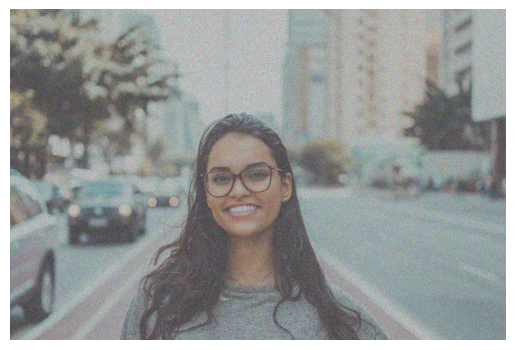

In [20]:
from skimage.util import random_noise
noise_img = random_noise(human_image1_cv2_conv, mode="s&p",amount=0.5)
noise_img = np.array(255*noise_img, dtype = 'uint8')
plt.imshow(noise_img)
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

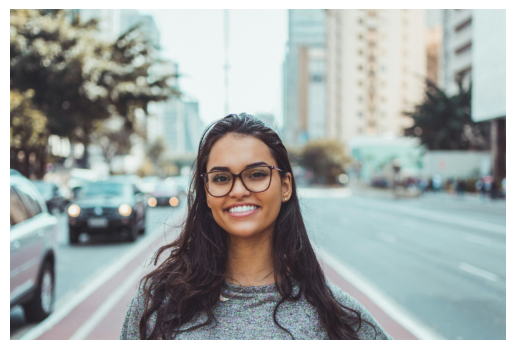

In [21]:
medianBlur_sp = cv2.medianBlur(noise_img, 9) 
plt.imshow(medianBlur_sp)
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

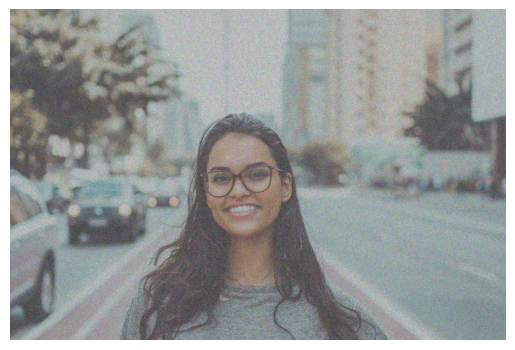

In [22]:
gaussian = cv2.GaussianBlur(noise_img, (9, 9), 0) #lets increase the kernel size here
plt.imshow(gaussian)
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

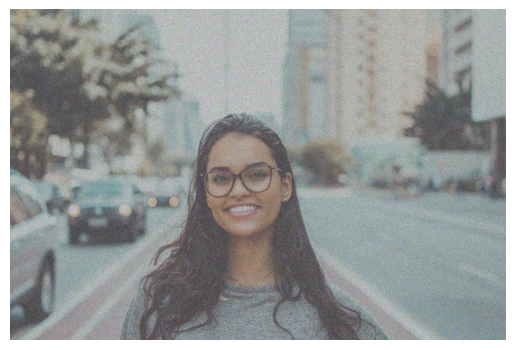

In [23]:
bilateral = cv2.bilateralFilter(noise_img, 9, 75, 75) 
plt.imshow(bilateral)
plt.axis('off')

### 5. Resizing and Scaling of an image 

Here, we could have resized the image to our desired size but for now, we will reduced the image into quarter of its actual size using functions.

(np.float64(-0.5), np.float64(1499.5), np.float64(999.5), np.float64(-0.5))

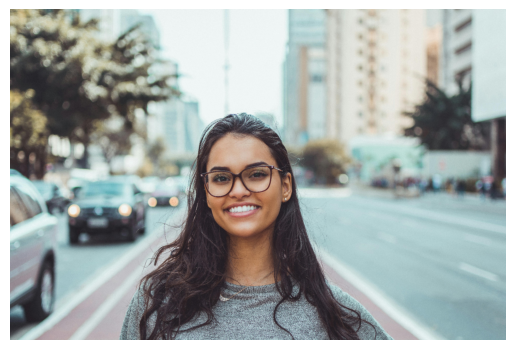

In [24]:
resized_image = cv2.resize(human_image1_cv2_conv,None, fx=0.25, fy=0.25) 
plt.imshow(resized_image)
plt.axis('off')

In [25]:
human_image1.shape #shape before conversion

(4000, 6000, 3)

In [26]:
resized_image.shape #shape after conversion 

(1000, 1500, 3)

Let's say we want the image to be resized into (100,200). How would that look?

(np.float64(-0.5), np.float64(99.5), np.float64(199.5), np.float64(-0.5))

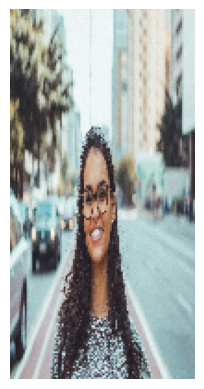

In [27]:
resize_image = cv2.resize(human_image1,(100, 200)) 
plt.imshow(resize_image)
plt.axis('off')

How about upscalling the image? 

In [28]:
human_image1.shape

(4000, 6000, 3)

Let's upscale the image to 5000 x 7000. Here we need to tell cv2 on how to upscale the image, which means we need to specify the interpolation. We have various ways to interpolate the image, let's use the cubic interpolation here instead.

(np.float64(-0.5), np.float64(6999.5), np.float64(4999.5), np.float64(-0.5))

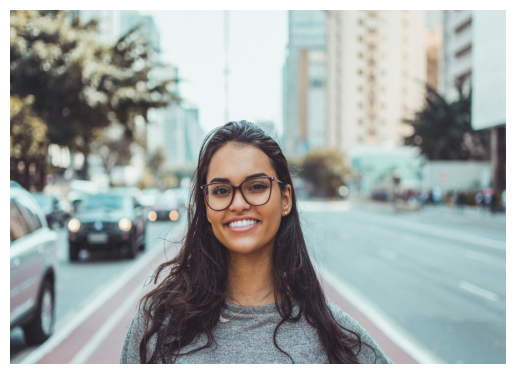

In [29]:
upscaled_image = cv2.resize(human_image1, (7000, 5000), interpolation= cv2.INTER_CUBIC)
plt.imshow(upscaled_image)
plt.axis('off')

In [30]:
upscaled_image.shape

(5000, 7000, 3)

### 6. Cropping

Since images are represented using arrays, we can perform cropping by specifying the start and end coordinates.

(np.float64(-0.5), np.float64(5999.5), np.float64(2499.5), np.float64(-0.5))

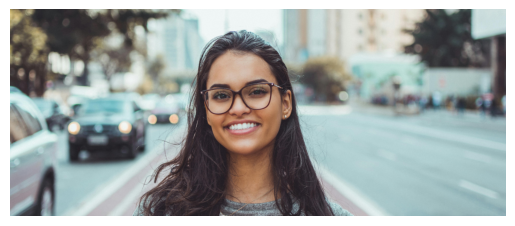

In [31]:
cropped_image = human_image1[1000:3500,:,:] # length wise cropping
plt.imshow(cropped_image)
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(3999.5), np.float64(-0.5))

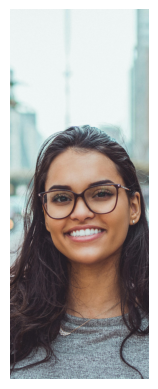

In [32]:
cropped_image = human_image1[:,2000:3500,:] # breath wise cropping
plt.imshow(cropped_image)
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(2499.5), np.float64(-0.5))

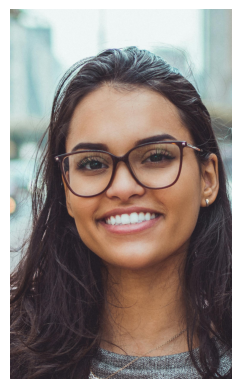

In [33]:
cropped_image = human_image1[1000:3500,2000:3500,:] # length and breadth wise cropping
plt.imshow(cropped_image)
plt.axis('off')

### 7. Rotating

a. Rotating by 90 degree clockwise

(np.float64(-0.5), np.float64(3999.5), np.float64(5999.5), np.float64(-0.5))

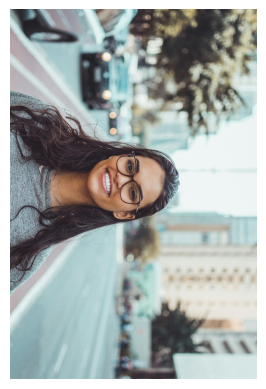

In [34]:
image = cv2.rotate(human_image1, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image)
plt.axis('off')

b. Rotating image 90 counter clockwise

(np.float64(-0.5), np.float64(3999.5), np.float64(5999.5), np.float64(-0.5))

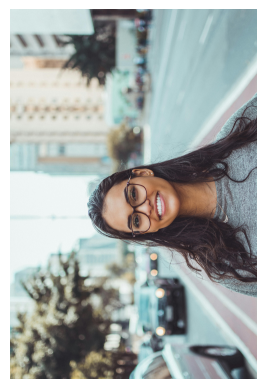

In [35]:
image = cv2.rotate(human_image1, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(image)
plt.axis('off')

c. Rotate image by 180 (flipping the image)

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

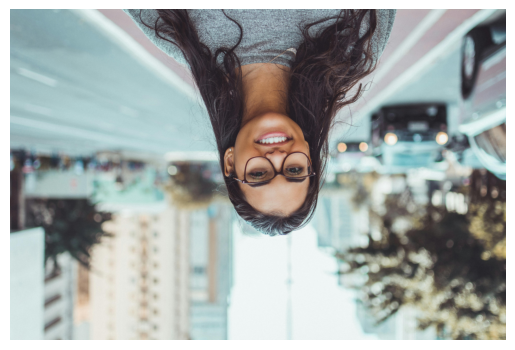

In [36]:
image = cv2.rotate(human_image1, cv2.ROTATE_180)
plt.imshow(image)
plt.axis('off')

Exploration of different techniques such as affine will be done as we progress.

## Let's try making a Pipieline that does the following:

a. Turns image into grayscale

b. Blurs the image

c. Smoothens the image

d. Performs Edge Detection 


In [ ]:
class ImageProcessingPipieline:
    def __init__(self, steps = None):
        self.steps = steps if steps else [] 